In [1]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats # Usaremos para moda, se necessário, e outras funções estatísticas

# Configurações para melhores visualizações
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 📊 Análise Exploratória de Dados: Universo Pokémon! ⚡⚡

Bem-vindos à nossa jornada de análise de dados no fascinante universo Pokémon! Neste notebook, vamos explorar um conjunto de dados contendo informações sobre diferentes espécies de Pokémon, suas estatísticas de combate, tipos e outras características.

Nosso foco será a **estatística descritiva**. Vamos aprender a:
* Calcular medidas de tendência central (média, mediana, moda).
* Analisar medidas de dispersão (amplitude, variância, desvio padrão, intervalo interquartil).
* Criar e interpretar tabelas de frequência.
* Visualizar distribuições de dados com histogramas e boxplots.
* Investigar correlações entre diferentes atributos dos Pokémon.
* Entender o conceito básico de amostragem.

**Objetivo:** Ao final deste notebook, você será capaz de resumir, descrever e visualizar as principais características de um conjunto de dados, extraindo insights valiosos sobre os Pokémon.

**Dataset:** Utilizaremos o dataset "Pokemon.csv", que contém as seguintes colunas:

* `#`: ID numérico do Pokémon (não usaremos para análise estatística, mas é um identificador).
* `Name`: Nome do Pokémon.
* `Type 1`: Tipo primário do Pokémon (ex: Grass, Fire, Water).
* `Type 2`: Tipo secundário do Pokémon (alguns Pokémon não possuem).
* `HP`: Pontos de Vida (Health Points) - indica a vitalidade do Pokémon.
* `Attack`: Ataque físico - indica o poder de ataques físicos.
* `Defense`: Defesa física - indica a resistência a ataques físicos.
* `Sp. Atk`: Ataque Especial - indica o poder de ataques especiais.
* `Sp. Def`: Defesa Especial - indica a resistência a ataques especiais.
* `Speed`: Velocidade - determina a ordem de ataque em batalhas.
* `Generation`: Geração em que o Pokémon foi introduzido.
* `Legendary`: Booleano (True/False) indicando se o Pokémon é Lendário.

**Nota sobre a coluna `Type 2`:** Esta coluna possui alguns valores ausentes (NaN - Not a Number), pois nem todos os Pokémon têm um segundo tipo. Para simplificar nossa análise descritiva inicial, **não focaremos nesta coluna para cálculos que exijam dados completos em todas as linhas**, mas podemos explorá-la separadamente em contagens, por exemplo. O importante é estar ciente desses dados ausentes!

Vamos começar carregando nossos dados!

In [2]:
# Carregar o dataset
df_pokemon = pd.read_csv('Pokemon.csv')

# Visualizar as primeiras linhas do dataframe
print("Primeiras 5 linhas do dataset:")
df_pokemon.head()

Primeiras 5 linhas do dataset:


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [3]:
# Obter informações gerais sobre o dataframe
print("\nInformações gerais do dataset:")
df_pokemon.info()



Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


## 🚀 Exploração Inicial dos Dados

Acabamos de carregar nosso dataset! A função `head()` nos mostra as primeiras linhas, e `info()` nos dá um resumo das colunas, seus tipos de dados e a quantidade de valores não nulos.

Observamos que:
* Temos 800 Pokémon no nosso dataset.
* A coluna `#` é um identificador numérico.
* `Name`, `Type 1`, `Type 2` são do tipo `object` (strings).
* As colunas de estatísticas (`HP`, `Attack`, etc.), `Generation` são numéricas (`int64`).
* `Legendary` é do tipo `bool` (True/False).
* A coluna `Type 2` tem 386 valores ausentes, como esperado.

Para facilitar algumas análises, podemos renomear colunas com espaços ou caracteres especiais, se houver. No nosso caso, `Sp. Atk` e `Sp. Def` são exemplos.

**Decisão sobre `Type 2`:** Para as análises de estatísticas descritivas numéricas principais, vamos focar nas colunas que não possuem (ou possuem poucos) valores ausentes. Podemos analisar `Type 2` separadamente quando formos ver frequências de tipos.

In [4]:
# Renomear colunas para facilitar o acesso (opcional, mas recomendado)
df_pokemon = df_pokemon.rename(columns={
    '#': 'ID',
    'Type 1': 'Type1',
    'Type 2': 'Type2',
    'HP': 'HP',
    'Attack': 'Attack',
    'Defense': 'Defense',
    'Sp. Atk': 'Sp_Atk',
    'Sp. Def': 'Sp_Def',
    'Speed': 'Speed',
    'Generation': 'Generation',
    'Legendary': 'Legendary'
})

# Confirmar as novas colunas
print("Nomes das colunas após renomear:")
print(df_pokemon.columns)

Nomes das colunas após renomear:
Index(['ID', 'Name', 'Type1', 'Type2', 'HP', 'Attack', 'Defense', 'Sp_Atk',
       'Sp_Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


## 🔢 Estatísticas Descritivas Gerais

Pandas oferece uma função muito útil, `.describe()`, que calcula várias estatísticas descritivas para as colunas numéricas de uma vez!

In [5]:
# Estatísticas descritivas para colunas numéricas
print("Estatísticas descritivas das colunas numéricas:")
df_pokemon.describe()

Estatísticas descritivas das colunas numéricas:


,ID,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [6]:
# Podemos também incluir colunas não numéricas (como 'Type1') para ver contagens e valores únicos
print("\nEstatísticas descritivas incluindo tipos 'object' e 'bool':")
df_pokemon.describe(include=['object', 'bool'])


Estatísticas descritivas incluindo tipos 'object' e 'bool':


,Name,Type1,Type2,Legendary
count,800,800,414,800
unique,800,18,18,2
top,Pumpkaboo Super Size,Water,Flying,False
freq,1,112,97,735


## 🎯 Medidas de Tendência Central

Estas medidas nos dão uma ideia do valor "típico" ou "central" em um conjunto de dados.

* **Média (Mean):** A soma de todos os valores dividida pelo número de valores. Sensível a outliers (valores extremos).
* **Mediana (Median):** O valor do meio quando os dados estão ordenados. Menos sensível a outliers.
* **Moda (Mode):** O valor que aparece com mais frequência. Pode haver mais de uma moda.

In [7]:
# Selecionar colunas de atributos de combate
stats_cols = ['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']

print("Médias dos atributos de combate:")
print(df_pokemon[stats_cols].mean())

print("\nMedianas dos atributos de combate:")
print(df_pokemon[stats_cols].median())

print("\nModas dos atributos de combate (pode haver múltiplas modas por coluna):")
# A função mode() do pandas retorna um DataFrame, pois pode haver múltiplas modas
for col in stats_cols:
    print(f"Moda(s) para {col}: {df_pokemon[col].mode().tolist()}")

print("\nModa para 'Type1':")
print(df_pokemon['Type1'].mode().tolist())

Médias dos atributos de combate:
HP         69.25875
Attack     79.00125
Defense    73.84250
Sp_Atk     72.82000
Sp_Def     71.90250
Speed      68.27750
dtype: float64

Medianas dos atributos de combate:
HP         65.0
Attack     75.0
Defense    70.0
Sp_Atk     65.0
Sp_Def     70.0
Speed      65.0
dtype: float64

Modas dos atributos de combate (pode haver múltiplas modas por coluna):
Moda(s) para HP: [60]
Moda(s) para Attack: [100]
Moda(s) para Defense: [70]
Moda(s) para Sp_Atk: [60]
Moda(s) para Sp_Def: [80]
Moda(s) para Speed: [50]

Moda para 'Type1':
['Water']


## ↔️ Medidas de Dispersão

Estas medidas nos dizem o quão espalhados ou variados os dados estão.

* **Amplitude (Range):** Diferença entre o valor máximo e mínimo.
* **Variância (Variance):** Média dos quadrados das diferenças entre cada valor e a média. Dá uma ideia da dispersão dos dados.
* **Desvio Padrão (Standard Deviation):** Raiz quadrada da variância. É expresso na mesma unidade dos dados originais, facilitando a interpretação.
* **Intervalo Interquartil (IQR - Interquartile Range):** Diferença entre o terceiro quartil (Q3 - 75º percentil) e o primeiro quartil (Q1 - 25º percentil). Mede a dispersão dos 50% centrais dos dados, menos sensível a outliers.

In [8]:
print("Amplitude (Range) dos atributos de combate:")
for col in stats_cols:
    range_val = df_pokemon[col].max() - df_pokemon[col].min()
    print(f"Amplitude para {col}: {range_val} (Min: {df_pokemon[col].min()}, Max: {df_pokemon[col].max()})")

print("\nVariância dos atributos de combate:")
print(df_pokemon[stats_cols].var())

print("\nDesvio Padrão dos atributos de combate:")
print(df_pokemon[stats_cols].std())

print("\nQuartis e Intervalo Interquartil (IQR) para 'Attack':")
Q1_attack = df_pokemon['Attack'].quantile(0.25)
Q3_attack = df_pokemon['Attack'].quantile(0.75)
IQR_attack = Q3_attack - Q1_attack
print(f"Q1 (Attack): {Q1_attack}")
print(f"Q3 (Attack): {Q3_attack}")
print(f"IQR (Attack): {IQR_attack}")

# Podemos calcular para todas as colunas de uma vez
print("\nIQRs para todos os atributos de combate:")
Q1 = df_pokemon[stats_cols].quantile(0.25)
Q3 = df_pokemon[stats_cols].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Amplitude (Range) dos atributos de combate:
Amplitude para HP: 254 (Min: 1, Max: 255)
Amplitude para Attack: 185 (Min: 5, Max: 190)
Amplitude para Defense: 225 (Min: 5, Max: 230)
Amplitude para Sp_Atk: 184 (Min: 10, Max: 194)
Amplitude para Sp_Def: 210 (Min: 20, Max: 230)
Amplitude para Speed: 175 (Min: 5, Max: 180)

Variância dos atributos de combate:
HP          652.019323
Attack     1053.480599
Defense     972.410707
Sp_Atk     1070.748536
Sp_Def      774.448554
Speed       844.511133
dtype: float64

Desvio Padrão dos atributos de combate:
HP         25.534669
Attack     32.457366
Defense    31.183501
Sp_Atk     32.722294
Sp_Def     27.828916
Speed      29.060474
dtype: float64

Quartis e Intervalo Interquartil (IQR) para 'Attack':
Q1 (Attack): 55.0
Q3 (Attack): 100.0
IQR (Attack): 45.0

IQRs para todos os atributos de combate:
HP         30.00
Attack     45.00
Defense    40.00
Sp_Atk     45.25
Sp_Def     40.00
Speed      45.00
dtype: float64


## 📊 Visualizando Distribuições

Gráficos são essenciais para entender a forma da distribuição dos dados.

* **Histograma:** Mostra a frequência de valores dentro de intervalos (bins). Ajuda a ver a forma da distribuição (simétrica, assimétrica, etc.).
* **Boxplot (Diagrama de Caixa):** Exibe a mediana, os quartis (Q1, Q3), o IQR e possíveis outliers. Ótimo para comparar distribuições entre grupos.

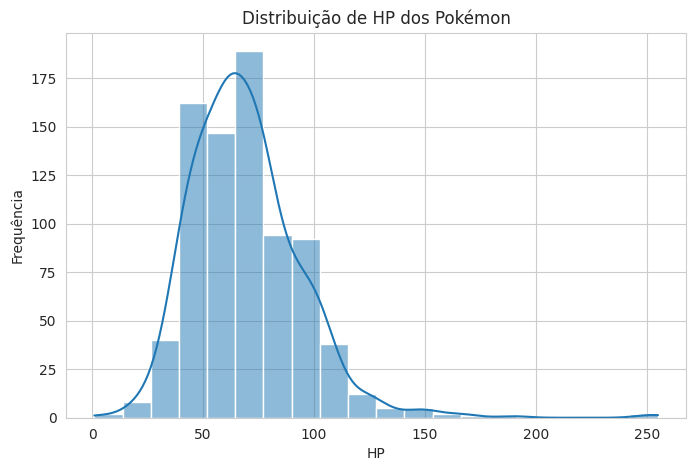

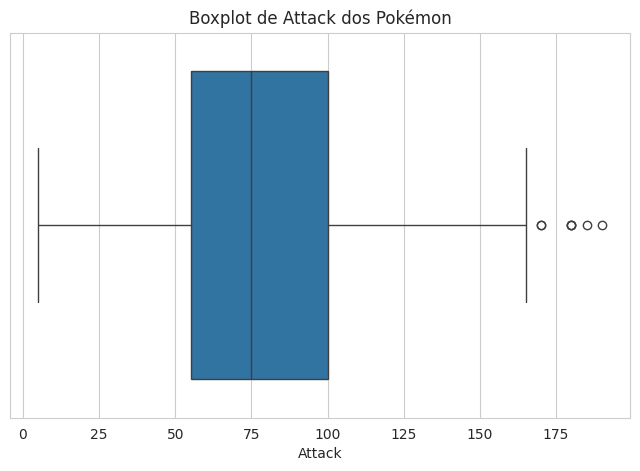

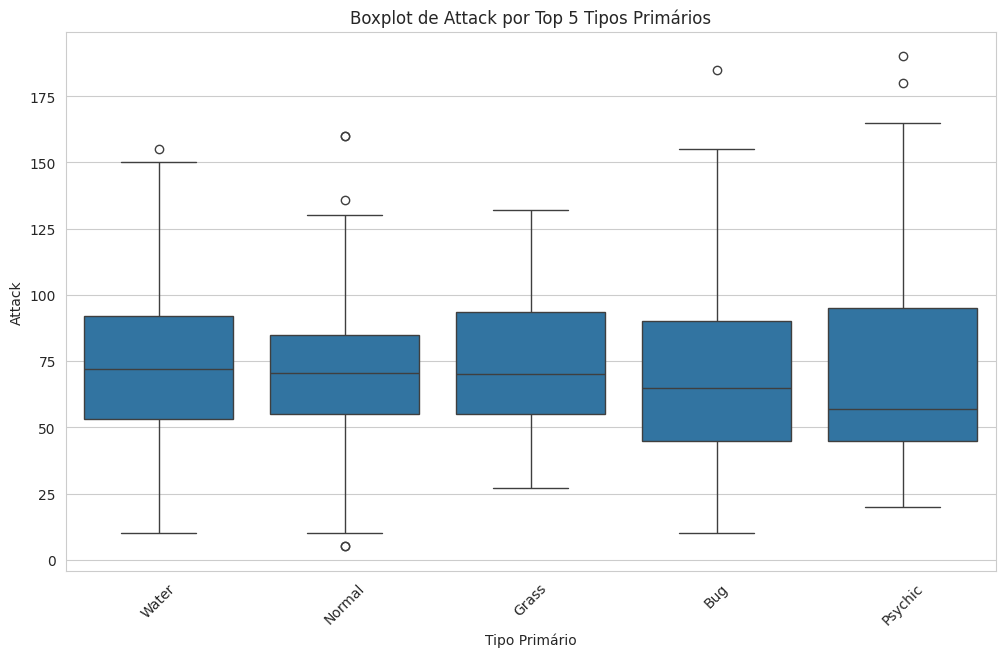

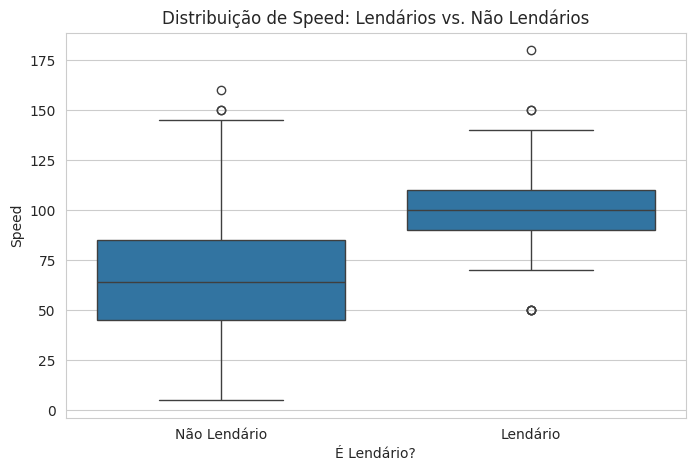

In [9]:
# Histograma para o atributo 'HP'
plt.figure(figsize=(8,5))
sns.histplot(df_pokemon['HP'], kde=True, bins=20) # kde=True adiciona uma estimativa da densidade do kernel
plt.title('Distribuição de HP dos Pokémon')
plt.xlabel('HP')
plt.ylabel('Frequência')
plt.show()

# Boxplot para o atributo 'Attack'
plt.figure(figsize=(8,5))
sns.boxplot(x=df_pokemon['Attack'])
plt.title('Boxplot de Attack dos Pokémon')
plt.xlabel('Attack')
plt.show()

# Boxplots comparando 'Attack' por 'Type1' (apenas alguns tipos para melhor visualização)
# Primeiro, vamos ver os tipos mais comuns para selecionar alguns
top_types = df_pokemon['Type1'].value_counts().nlargest(5).index
df_top_types = df_pokemon[df_pokemon['Type1'].isin(top_types)]

plt.figure(figsize=(12,7))
sns.boxplot(x='Type1', y='Attack', data=df_top_types, order=top_types)
plt.title('Boxplot de Attack por Top 5 Tipos Primários')
plt.xlabel('Tipo Primário')
plt.ylabel('Attack')
plt.xticks(rotation=45)
plt.show()

# Boxplot comparando 'Speed' entre Pokémon Lendários e Não Lendários
plt.figure(figsize=(8,5))
sns.boxplot(x='Legendary', y='Speed', data=df_pokemon)
plt.title('Distribuição de Speed: Lendários vs. Não Lendários')
plt.xlabel('É Lendário?')
plt.ylabel('Speed')
plt.xticks([0, 1], ['Não Lendário', 'Lendário']) # Melhora os rótulos do eixo x
plt.show()

## 📜 Tabelas de Frequência

Tabelas de frequência mostram quantas vezes cada valor (ou categoria) aparece em um conjunto de dados. São muito úteis para variáveis categóricas.

Podemos também criar tabelas de frequência para variáveis numéricas "discretizando-as", ou seja, agrupando valores em classes ou intervalos.

Tabela de Frequência para 'Type1':
Type1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

Tabela de Frequência Relativa para 'Type1':
Type1
Water       14.000
Normal      12.250
Grass        8.750
Bug          8.625
Psychic      7.125
Fire         6.500
Rock         5.500
Electric     5.500
Ground       4.000
Ghost        4.000
Dragon       4.000
Dark         3.875
Poison       3.500
Fighting     3.375
Steel        3.375
Ice          3.000
Fairy        2.125
Flying       0.500
Name: proportion, dtype: float64


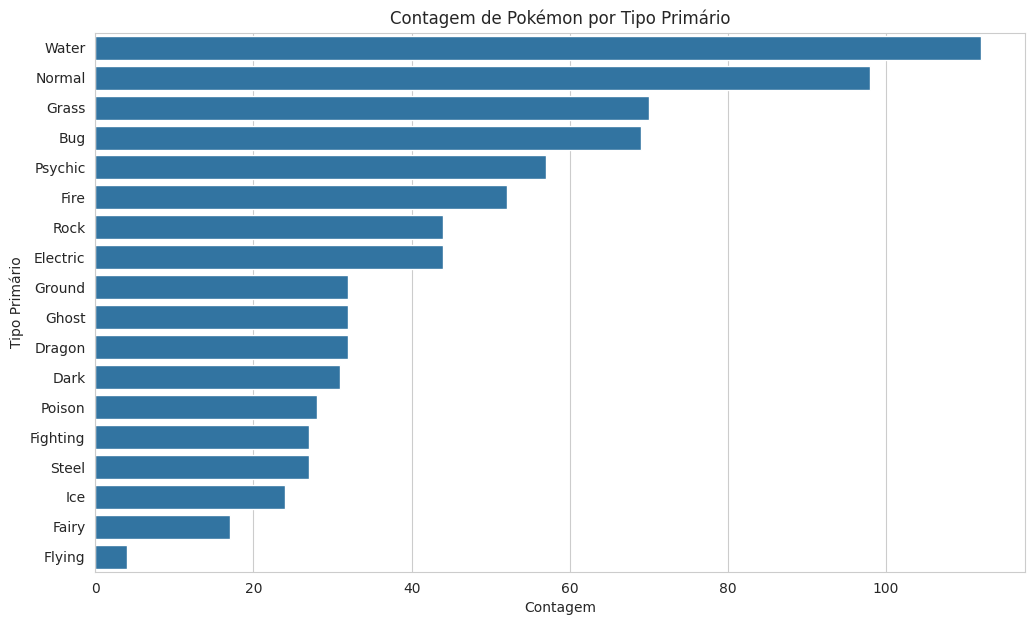


Tabela de Frequência para 'Generation':
Generation
1    166
2    106
3    160
4    121
5    165
6     82
Name: count, dtype: int64

Tabela de Frequência para Classes de HP:
HP_Class
0-40        50
41-80      514
81-120     209
121-160     21
>160         6
Name: count, dtype: int64


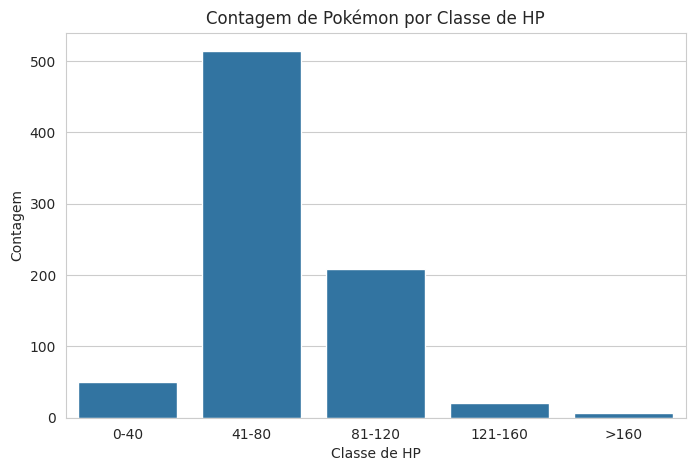

In [10]:
# Tabela de frequência para 'Type1'
print("Tabela de Frequência para 'Type1':")
freq_type1 = df_pokemon['Type1'].value_counts()
print(freq_type1)

# Tabela de frequência relativa (porcentagem) para 'Type1'
print("\nTabela de Frequência Relativa para 'Type1':")
freq_rel_type1 = df_pokemon['Type1'].value_counts(normalize=True) * 100
print(freq_rel_type1)

# Visualizar com um gráfico de barras
plt.figure(figsize=(12,7))
sns.countplot(y='Type1', data=df_pokemon, order=df_pokemon['Type1'].value_counts().index)
plt.title('Contagem de Pokémon por Tipo Primário')
plt.xlabel('Contagem')
plt.ylabel('Tipo Primário')
plt.show()

# Tabela de frequência para 'Generation'
print("\nTabela de Frequência para 'Generation':")
freq_generation = df_pokemon['Generation'].value_counts().sort_index() # sort_index para ordenar pela geração
print(freq_generation)

# Criando classes para o atributo 'HP'
# Definir os limites dos intervalos (bins)
# Ex: 0-40, 41-80, 81-120, 121-160, >160
bins_hp = [0, 40, 80, 120, 160, df_pokemon['HP'].max() + 1] # +1 para incluir o valor máximo
labels_hp = ['0-40', '41-80', '81-120', '121-160', '>160']

# Criar uma nova coluna com as classes de HP
df_pokemon['HP_Class'] = pd.cut(df_pokemon['HP'], bins=bins_hp, labels=labels_hp, right=False) # right=False significa [inicio, fim)

print("\nTabela de Frequência para Classes de HP:")
freq_hp_class = df_pokemon['HP_Class'].value_counts().sort_index()
print(freq_hp_class)

# Visualizar classes de HP
plt.figure(figsize=(8,5))
sns.countplot(x='HP_Class', data=df_pokemon, order=labels_hp)
plt.title('Contagem de Pokémon por Classe de HP')
plt.xlabel('Classe de HP')
plt.ylabel('Contagem')
plt.show()

## 🔗 Correlação entre Variáveis

Correlação mede a força e a direção da relação linear entre duas variáveis numéricas. O coeficiente de correlação de Pearson varia de -1 a +1:
* **+1:** Correlação linear positiva perfeita.
* **-1:** Correlação linear negativa perfeita.
* **0:** Nenhuma correlação linear.

**Importante:** Correlação não implica causalidade!

Usaremos gráficos de dispersão (scatter plots) para visualizar a relação entre duas variáveis e uma matriz de correlação para ver as correlações entre várias variáveis de uma vez.

Matriz de Correlação:
                  HP    Attack   Defense    Sp_Atk    Sp_Def     Speed  \
HP          1.000000  0.422386  0.239622  0.362380  0.378718  0.175952   
Attack      0.422386  1.000000  0.438687  0.396362  0.263990  0.381240   
Defense     0.239622  0.438687  1.000000  0.223549  0.510747  0.015227   
Sp_Atk      0.362380  0.396362  0.223549  1.000000  0.506121  0.473018   
Sp_Def      0.378718  0.263990  0.510747  0.506121  1.000000  0.259133   
Speed       0.175952  0.381240  0.015227  0.473018  0.259133  1.000000   
Generation  0.058683  0.051451  0.042419  0.036437  0.028486 -0.023121   

            Generation  
HP            0.058683  
Attack        0.051451  
Defense       0.042419  
Sp_Atk        0.036437  
Sp_Def        0.028486  
Speed        -0.023121  
Generation    1.000000  


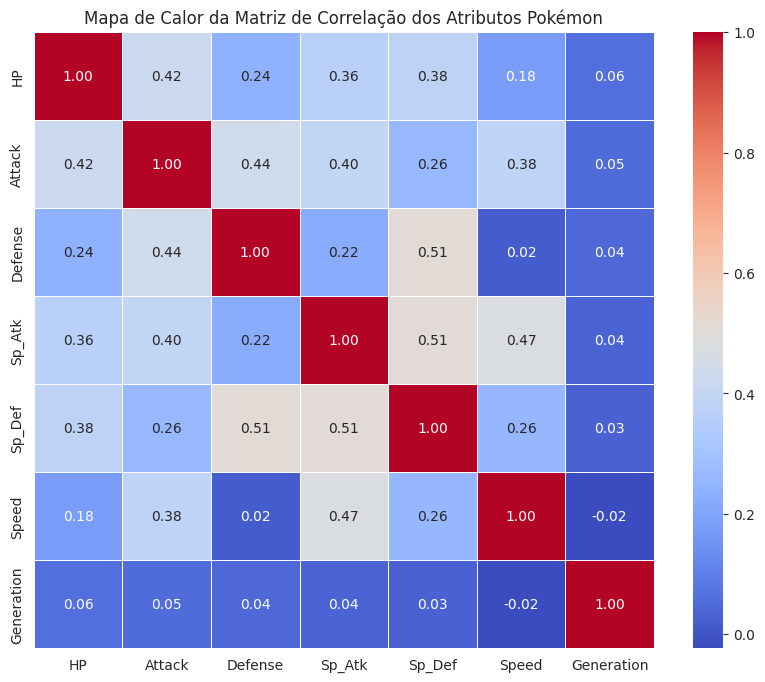

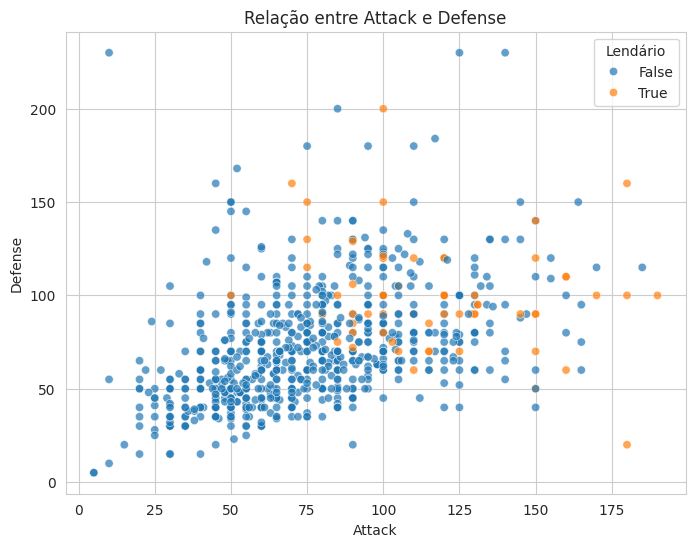

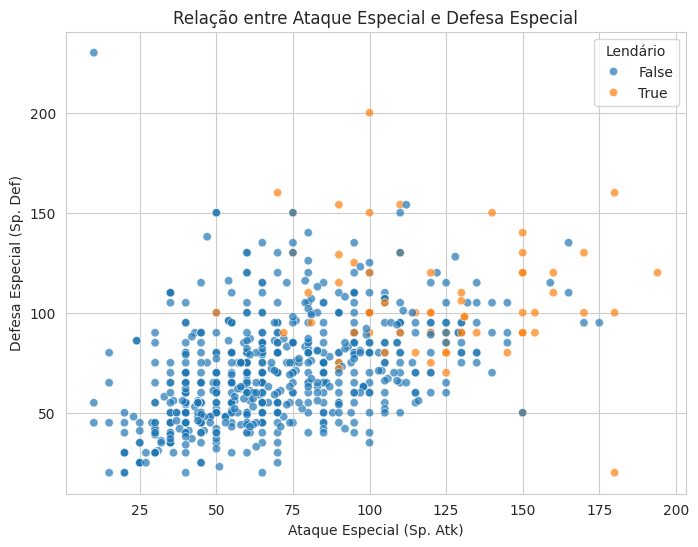

In [11]:
# Selecionar apenas colunas numéricas para a matriz de correlação
numerical_cols = df_pokemon.select_dtypes(include=np.number).columns.tolist()
# Remover 'ID' e 'Generation' se não quisermos correlacioná-los com atributos de combate de forma primária,
# ou deixar 'Generation' para ver se há alguma tendência. Vamos remover 'ID'.
numerical_cols.remove('ID')
# A coluna Legendary é booleana, mas o pandas a trata como 0 e 1, então pode ser incluída.

# Calcular a matriz de correlação
correlation_matrix = df_pokemon[numerical_cols].corr()

print("Matriz de Correlação:")
print(correlation_matrix)

# Visualizar a matriz de correlação com um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor da Matriz de Correlação dos Atributos Pokémon')
plt.show()

# Gráfico de dispersão (Scatter Plot) entre 'Attack' e 'Defense'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Attack', y='Defense', data=df_pokemon, hue='Legendary', alpha=0.7) # hue para colorir por Lendário
plt.title('Relação entre Attack e Defense')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.legend(title='Lendário')
plt.show()

# Gráfico de dispersão (Scatter Plot) entre 'Sp_Atk' e 'Sp_Def'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sp_Atk', y='Sp_Def', data=df_pokemon, hue='Legendary', alpha=0.7)
plt.title('Relação entre Ataque Especial e Defesa Especial')
plt.xlabel('Ataque Especial (Sp. Atk)')
plt.ylabel('Defesa Especial (Sp. Def)')
plt.legend(title='Lendário')
plt.show()

## 🎲 Amostragem (Uma Breve Introdução)

Em muitos cenários do mundo real, não temos acesso a toda a "população" de dados. Em vez disso, trabalhamos com uma **amostra** – um subconjunto representativo da população.

A estatística descritiva pode ser aplicada tanto à população completa (como estamos fazendo aqui com todos os 800 Pokémon do nosso dataset) quanto a amostras.

Vamos ver como tirar uma amostra aleatória simples dos nossos Pokémon e comparar algumas de suas estatísticas com as da população total.

In [12]:
# Definir o tamanho da amostra
tamanho_amostra = 50

# Tirar uma amostra aleatória simples sem reposição
# random_state é para garantir reprodutibilidade, para que todos obtenham a mesma amostra
amostra_pokemon = df_pokemon.sample(n=tamanho_amostra, random_state=42)

print(f"Primeiras 5 linhas da amostra de {tamanho_amostra} Pokémon:")
print(amostra_pokemon.head())

print(f"\nInformações da amostra:")
amostra_pokemon.info()

# Comparar a média de 'Attack' da população e da amostra
media_attack_populacao = df_pokemon['Attack'].mean()
media_attack_amostra = amostra_pokemon['Attack'].mean()

print(f"\nMédia de Attack (População Total): {media_attack_populacao:.2f}")
print(f"Média de Attack (Amostra de {tamanho_amostra}): {media_attack_amostra:.2f}")

# Comparar a mediana de 'HP' da população e da amostra
mediana_hp_populacao = df_pokemon['HP'].median()
mediana_hp_amostra = amostra_pokemon['HP'].median()

print(f"\nMediana de HP (População Total): {mediana_hp_populacao:.2f}")
print(f"Mediana de HP (Amostra de {tamanho_amostra}): {mediana_hp_amostra:.2f}")

# Comparar a contagem de Pokémon Lendários na população e na amostra (em proporção)
prop_lendarios_populacao = df_pokemon['Legendary'].value_counts(normalize=True).get(True, 0) * 100
prop_lendarios_amostra = amostra_pokemon['Legendary'].value_counts(normalize=True).get(True, 0) * 100

print(f"\nProporção de Lendários (População Total): {prop_lendarios_populacao:.2f}%")
print(f"Proporção de Lendários (Amostra de {tamanho_amostra}): {prop_lendarios_amostra:.2f}%")

Primeiras 5 linhas da amostra de 50 Pokémon:
      ID        Name     Type1   Type2  HP  Attack  Defense  Sp_Atk  Sp_Def  \
696  697   Hydreigon      Dark  Dragon  92     105       90     125      90   
667  668    Beheeyem   Psychic     NaN  75      75       75     125      95   
63    64   Growlithe      Fire     NaN  55      70       45      70      50   
533  534  Wash Rotom  Electric   Water  50      65      107     105     107   
66    67   Poliwhirl     Water     NaN  65      65       65      50      50   

     Speed  Generation  Legendary HP_Class  
696     98           5      False   81-120  
667     40           5      False    41-80  
63      60           1      False    41-80  
533     86           4      False    41-80  
66      90           1      False    41-80  

Informações da amostra:
<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 696 to 534
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   


# ATV1 - Questões para Reflexão e Análise

Agora é a sua vez de explorar e pensar sobre os dados! Responda às seguintes perguntas com base nas análises que fizemos e em novas explorações que você pode realizar. Não se limite a números; interprete os resultados!

1.  **Tendência Central dos Atributos:**
    * Qual atributo de combate (`HP`, `Attack`, `Defense`, `Sp_Atk`, `Sp_Def`, `Speed`) possui a maior média? E a maior mediana?
    * Se a média e a mediana de um atributo são muito diferentes, o que isso pode indicar sobre a distribuição desse atributo? (Dica: pense em outliers ou assimetria).

2.  **Dispersão dos Atributos:**
    * Qual atributo de combate apresenta a maior variabilidade (maior desvio padrão)? O que isso significa na prática para os Pokémon?
    * Olhando para o boxplot de `Speed` comparando Lendários e Não Lendários, qual grupo parece ter uma `Speed` mais consistente (menor dispersão)?

3.  **Tipos de Pokémon:**
    * Qual é o tipo primário (`Type1`) mais comum de Pokémon? E o menos comum?
    * Crie um gráfico de barras para a frequência de `Type2`. Lembre-se de como lidar com os valores ausentes para esta visualização (eles podem ser uma categoria "Nenhum" ou serem ignorados na contagem, dependendo do seu objetivo). O que você observa?

4.  **Distribuições:**
    * Observe o histograma de `HP`. A distribuição parece ser simétrica, assimétrica à direita (cauda longa para valores altos) ou assimétrica à esquerda (cauda longa para valores baixos)?
    * Compare os boxplots de `Attack` para os 5 tipos primários mais comuns. Existe algum tipo que se destaca por ter valores de `Attack` consistentemente mais altos ou mais baixos?

5.  **Correlações:**
    * Qual é a correlação mais forte (positiva ou negativa, ignorando o sinal por um momento) que você observou entre os atributos de combate na matriz de correlação? Interprete essa correlação. (Ex: Se `Attack` e `Defense` têm correlação positiva, o que isso sugere?)
    * Existe alguma correlação forte entre `Speed` e os atributos de ataque (`Attack`, `Sp_Atk`)? O que isso poderia significar em termos de estratégia de batalha Pokémon?
    * Observe o gráfico de dispersão entre `Attack` e `Defense`. A relação parece ser estritamente linear? Há muitos Pokémon que fogem da tendência geral?

6.  **Pokémon Lendários:**
    * Em geral, os Pokémon Lendários tendem a ter estatísticas de combate mais altas do que os não Lendários? Use as médias ou medianas dos atributos de combate, separando por `Legendary`, para embasar sua resposta. (Dica: você pode usar `df_pokemon.groupby('Legendary')[stats_cols].mean()`).
    * Observando os boxplots que construímos, os Pokémon Lendários parecem ter uma maior variabilidade em algum atributo específico em comparação com os não Lendários, ou são consistentemente altos em todos?

7.  **Gerações:**
    * Calcule a média de `HP`, `Attack` e `Defense` para cada `Generation`. Há alguma tendência perceptível no "poder" médio dos Pokémon ao longo das gerações?
    * Qual geração introduziu o maior número de Pokémon?

8.  **Amostragem:**
    * Ao comparar as estatísticas da amostra com as da população total, quão próximas elas ficaram?
    * Se você tirasse uma amostra muito pequena (ex: 5 Pokémon), você esperaria que as estatísticas da amostra fossem mais ou menos representativas da população total em comparação com a amostra de 50 Pokémon? Por quê?

9.  **Exploração Livre (HP por Classes):**
    * Analisando a tabela de frequência das classes de `HP` que criamos, qual classe de `HP` é a mais comum?
    * Os Pokémon Lendários estão mais concentrados em classes de `HP` mais altas? (Dica: filtre o DataFrame para Lendários e depois veja a distribuição de `HP_Class`).

10. **Conclusão Pessoal e Insight:**
    * Qual foi a descoberta mais interessante ou surpreendente que você fez ao analisar este universo de Pokémon? Descreva-a e explique por que chamou sua atenção.

In [13]:
#Para questão, crie uma célula de código ou markdown para colocar suas respostas. Soluções em formato código são exigidas somente para os exercícios 3, 6, 7, 9.

**1° questão a)**

Ao avaliar os dados, percebe-se que o atributo que possui a maior média
é Attack e o atributo que possui a maior mediana também é Attack.

**1° questão b)**

Geralmente, isso indica a presença de valores assimétricos, ou seja, há a
presença de valores que são muito altos ou que são muito baixos, que são
chamados de outliers, um valor que se diferencia muito dos outros dados.

**2° questão a)**

O atributo de combate que apresenta maior variabilidade (desvio padrão) é
o Sp_Atk. Isso significa que há uma grande dispersão dos valores em relação
à média resultando numa variabilidade maior para o atributo Sp_Atk.

**2° questão b)**

Ao avaliar os boxplots de Speed da comparação de Lendários e Não Lendários,
percebe-se que o grupo com Speed mais consistente é o grupo de Lendários
por haver uma menor distribuição de valores.

**3° questão a)**

Pode-se analisar esse tipo de informação com a frequência de cada tipo
primário. Como o tipo primário com maior frequência é Water com 112
aparições, o tipo primário mais comum é Water. O tipo primário menos comum
é Flying que possui a menor frequência com 4 aparições.

Tabela de Frequência para 'Type2':
Type2
Nenhum      386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: count, dtype: int64


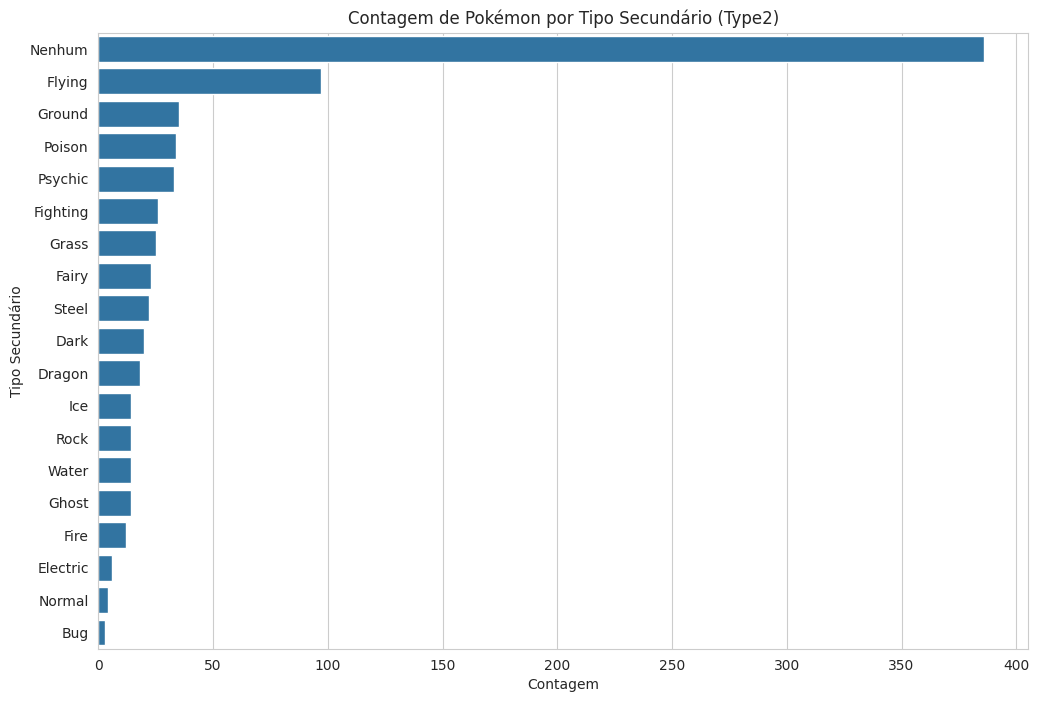

In [14]:
#3° questão b)
#Esse código transforma a categoria Type2 de forma que os indices que tiverem valor NaN sejam representados por "Nenhum":
df_pokemon['Type2'] = df_pokemon['Type2'].fillna('Nenhum')
#Calculando a tabela de frequência para a coluna 'Type2'
freq_type2 = df_pokemon['Type2'].value_counts()

print("Tabela de Frequência para 'Type2':")
print(freq_type2)

#Aqui é gerado o gráfico de barras da frequência
plt.figure(figsize=(12, 8)) 
sns.countplot(y='Type2', data=df_pokemon, order=freq_type2.index)
plt.title('Contagem de Pokémon por Tipo Secundário (Type2)')
plt.xlabel('Contagem')
plt.ylabel('Tipo Secundário')
plt.show()

Observo que há vários Pokémons que não tem um segundo tipo, quase sendo metade de todos os Pokémons.

**4° questão a)**

Analisando o histograma, há um maior número de valores de frequência para
a segunda classe de HP mais baixa (41-80) o que contribui para uma cauda
longa para valores baixos.

**4° questão b)**

Avaliando os boxplots de Attack para os 5 tipos primários mais comuns,
todos os tipos primários aparentam ter um intervalo de Attack bem próximo
uns dos outros. Vale destacar que o tipo Psychic possui vários valores 
acima da mediana, resultando no bigode superior do boxplot ser grande.


**5° questão a)**

As correlações mais fortes são a correlação de Sp_Atk e Sp_Def, e a
correlação de Def e Sp_Def com um valor de 0,51 ambos. Isso indica
que há uma relação linear entre Sp_Atk e Sp_Def, assim como entre Def e
Sp_Def. Uma correlação positiva indica que se Sp_Atk aumentar, Sp_Def
pode aumentar, e que se Def aumentar, Sp_Def pode aumentar.

**5° questão b)**

A correlação entre Speed e Attack é 0,38, e a correlação entre Speed
e Sp_Atk é 0,47. Isso mostra que embora fraca, há uma pequena correlação
entre Speed com esses 2 atributos. Em uma batalha Pokémon, há uma tendência
de Pokémons mais rápidos possuírem mais Attack ou mais Sp_Atk, portanto, caso um
indivíduo querer um Pokémon com baixa Speed, talvez seja melhor um Pokémon
com alto Sp_Def ou Def, aumentando a possibilidade de reduzir os danos
sofridos para o Pokémon.

**5° questão c)**

A relação entre Attack e Defense não parece ser estritamente linear por
causa dos valores estarem um pouco distribuídos e pela presença de alguns
outliers, mas percebe-se um pouco de linearidade. Verificando o número de
Pokémons que estão fora da linearidade e comparando com o número de
Pokémons (800), não há muitos Pokémons fora do padrão de aumento.

In [15]:
#6° questão a)
mediaLen = df_pokemon.groupby('Legendary')[stats_cols].mean()
print(mediaLen)

                  HP      Attack    Defense      Sp_Atk      Sp_Def  \
Legendary                                                             
False      67.182313   75.669388  71.559184   68.454422   68.892517   
True       92.738462  116.676923  99.661538  122.184615  105.938462   

                Speed  
Legendary              
False       65.455782  
True       100.184615  


Após calcular a média dos atributos de combate para Pokémons Lendários e não Lendários,
é possível notar que os Pokémons Lendários em geral possuem uma média maior em todo 
atributo de combate que os Pokémons não Lendários.

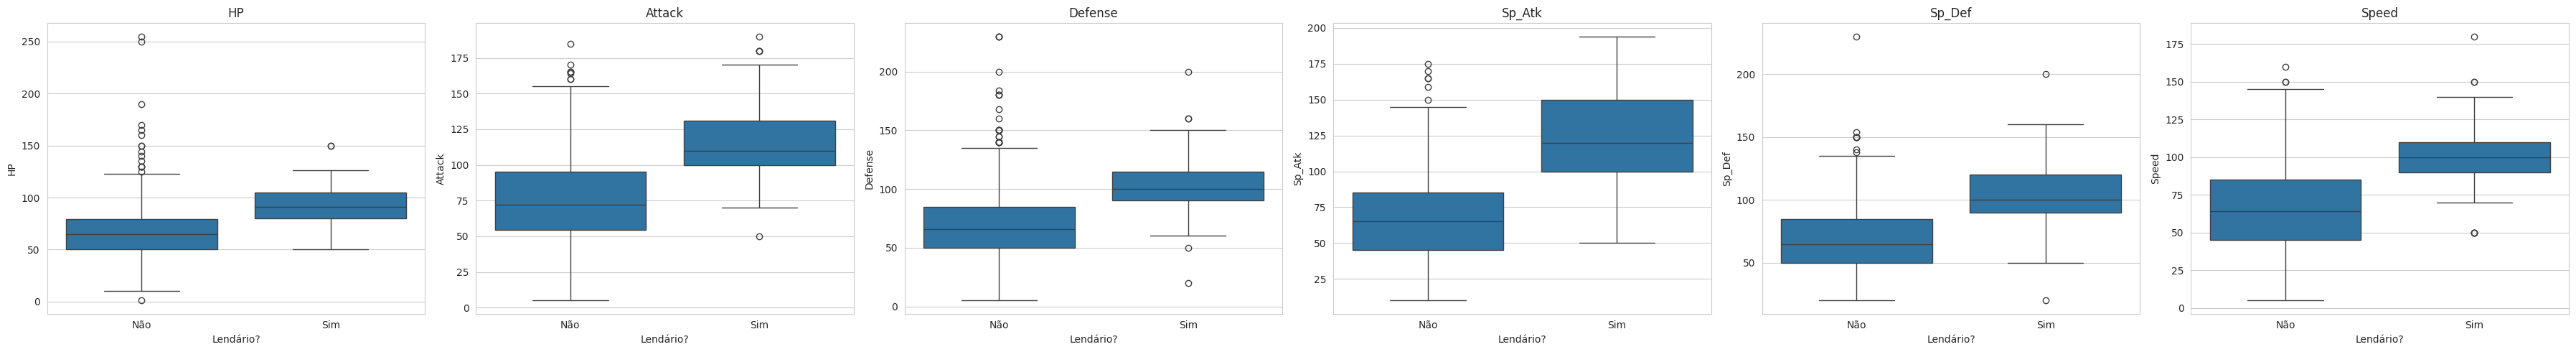

In [16]:
#6° questão b)

#Determinando o número de plots
n_plots = len(stats_cols)
fig, axes = plt.subplots(nrows=1, ncols=n_plots, figsize=(n_plots * 6, 5)) 

#Aqui é iterado sobre cada atributo de combate e seu respectivo eixo no subplot
for i, col in enumerate(stats_cols):
    sns.boxplot(x='Legendary', y=col, data=df_pokemon, ax=axes[i]) 
    axes[i].set_title(f'{col}') #Definindo o título para cada subplot
    axes[i].set_xlabel('Lendário?') #Definindo o rótulo do eixo x para cada subplot
    axes[i].set_ylabel(col) #Definindo o rótulo do eixo y para cada subplot
    axes[i].set_xticks([0, 1], ['Não', 'Sim']) #Melhorando os rótulos do eixo x para cada subplot

#Ajustando o layout para evitar sobreposição
plt.tight_layout()

#Mostrando a figura com todos os subplots
plt.show()

Observando os boxplots, é possível notar que os Pokémon Lendários têm atributos consistentemente mais altos do que os não Lendários em todos os aspectos avaliados. Em relação à variabilidade, o único atributo que apresentou maior dispersão entre os Lendários foi o Sp_Atk, ou seja, dentro desse grupo, há mais diferença entre os valores de Sp_Atk. Ainda assim, mesmo com essa variação, os valores de Sp_Atk dos Lendários continuam, em média, superiores aos dos não Lendários.

In [19]:
#7° questão a)
stats = ['HP', 'Attack', 'Defense'] #Definindo os atributos a serem avaliados
medias = df_pokemon.groupby('Generation')[stats].mean()
print("Médias dos Atributos por Geração:")
print(medias)

#Calculando o poder médio por geração (somando HP, Attack e Defense, e depois dividir por 3):
poder_medio_por_geracao = medias.mean(axis=1)

print("\nPoder Médio por Geração:")
print(poder_medio_por_geracao)
#7° questão b)
#Contando a frequência de cada geração
contagem_por_geracao = df_pokemon['Generation'].value_counts()

print("Contagem de Pokémon por Geração:")
print(contagem_por_geracao)

#Encontrando a geração com a maior contagem
geracao_com_mais_pokemon = contagem_por_geracao.idxmax()
print(f"A geração com mais Pokémons é a Geração {geracao_com_mais_pokemon}")

Médias dos Atributos por Geração:
                   HP     Attack    Defense
Generation                                 
1           65.819277  76.638554  70.861446
2           71.207547  72.028302  73.386792
3           66.543750  81.625000  74.100000
4           73.082645  82.867769  78.132231
5           71.787879  82.066667  72.327273
6           68.268293  75.804878  76.682927

Poder Médio por Geração:
Generation
1    71.106426
2    72.207547
3    74.089583
4    78.027548
5    75.393939
6    73.585366
dtype: float64
Contagem de Pokémon por Geração:
Generation
1    166
5    165
3    160
4    121
2    106
6     82
Name: count, dtype: int64
A geração com mais Pokémons é a Geração 1


Observando os dados, pode-se perceber que há uma têndencia de aumento no poder médio da geração 1 para a geração 4 e após isso o poder médio começa a diminuir nas próximas gerações. Também é possível notar que, após contar a quantidade de Pokémons por geração, a maior contagem de Pokémons está presente na geração.

**8° questão a)**

A média de Attack da população total é de 79.00 e a da amostra foi 69.76,
indicando uma leve diferença. A mediana de HP da população total foi 65.00
e a da amostra foi 62.50 que chegou bem próximo ao valor real. A proporção
de lendários da população total é de 8,12% enquanto a da amostra foi de
4,00%, ou seja menos da metade da verdadeira proporção de lendários da
população.

**8° questão b)**

Eu esperaria que a população de 5 Pokémon fosse menos representativa da
população total em comparação com 50 Pokémons ja que há uma grande chance
da amostra escolhida não ter todas as características da população total
como Pokémons Lendários.

**9° questão a)**

Após analisar a tabela de frequência das classes de HP, a classe de HP
mais comum é a de 41-80.


Tabela de Frequência para Classes de HP dos Pokémon Lendários:
HP_Class
0-40        0
41-80      13
81-120     44
121-160     8
>160        0
Name: count, dtype: int64


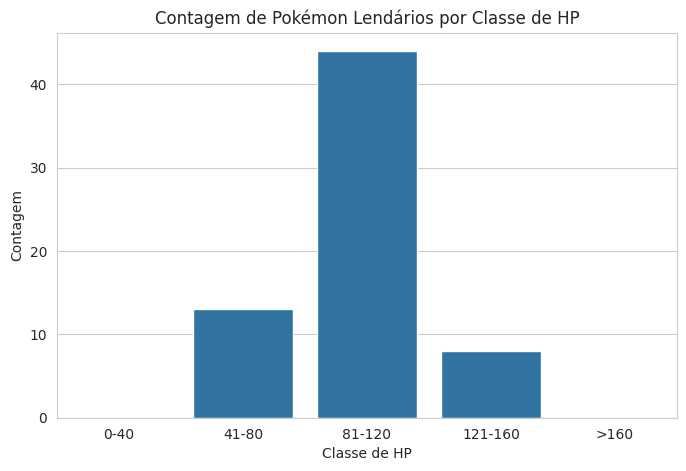

In [18]:
#9° questão b)
# Filtrar o DataFrame para incluir apenas Pokémon Lendários
df_lendarios = df_pokemon[df_pokemon['Legendary'] == True].copy()

# Criar as classes de HP para os Pokémon Lendários usando os mesmos bins e labels
df_lendarios['HP_Class'] = pd.cut(df_lendarios['HP'], bins=bins_hp, labels=labels_hp, right=False)

# Calcular a tabela de frequência para as classes de HP dos Lendários
print("\nTabela de Frequência para Classes de HP dos Pokémon Lendários:")
freq_hp_class_lendarios = df_lendarios['HP_Class'].value_counts().sort_index()
print(freq_hp_class_lendarios)

# Visualizar classes de HP para Lendários
plt.figure(figsize=(8,5))
sns.countplot(x='HP_Class', data=df_lendarios, order=labels_hp)
plt.title('Contagem de Pokémon Lendários por Classe de HP')
plt.xlabel('Classe de HP')
plt.ylabel('Contagem')
plt.show()

Ao analisar a contagem de cada classe de HP, pode-se perceber que os Pokémons Lendários em sua maioria estão concentrados na classe de HP 81-120 que é uma classe de HP mais alta que a classe de HP com mais Pokémons.

**10° questão**

Fiquei surpreso ao descobrir que os Pokémons Lendários em média
possuem atributos de combate extremamente superiores que um Pokémon comum.
Isso faz com que seja muito vantajoso usa-lo em uma batalha.